In [1]:
# Mars Data Challenege Part 2

# Section 1 - Get the data
# Import dependencies 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')


from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

# Set up Browser with Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)


In [2]:
# Have the browser navigate to the website and copy the content
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
html = browser.html
soup = soup(html, 'html.parser')


In [3]:
 # Find the table
table = soup.find('table', class_='table')
table.head


In [4]:
# Find the header
table_header = table.find_all('th')

headers=[]
for header_ele in table_header:
    title=header_ele.text
    headers.append(title)
    
headers

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [5]:
# Put the data into a pandas DataFrame
df=pd.DataFrame(columns=headers)
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure


In [6]:
# Find the row data and add to the pandas DataFrame
for row in table.find_all('tr',class_='data-row'):
        data = row.find_all('td')
        row_data=[td.text.strip() for td in data]
        lenghth=len(df)
        df.loc[lenghth]=row_data
        
df


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [7]:
# Close the browser session 
browser.quit()

In [8]:
# Check the data types in the table
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [9]:
# Change data types 
df['id']=df['id'].astype(int)
df['terrestrial_date']=pd.to_datetime(df['terrestrial_date'])
df['sol']=df['sol'].astype(int)
df['ls']=df['ls'].astype(int)
df['month']=df['month'].astype(int)
df['min_temp']=df['min_temp'].astype(float)
df['pressure']=df['pressure'].astype(float)

# Check data types again 
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 87.5 KB


In [10]:
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [11]:
# Section 2 - Start analyzing the data to answer the following questions (Steps 6 - 10):

# Step 6 - How many months exist on Mars?
# This is a trick question - "month" is a term we use on Earth to designate 1 revolution of our moon. Mars has 2 moons:
# one goes around very fast; one very slow and is far away. The term "months" is not applicable to Mars.

nb_of_months=df['month'].nunique()
print(f'There are', nb_of_months ,'Earth months of data in the Mars Temperature Data.')

There are 12 Earth months of data in the Mars Temperature Data.


In [12]:
# Steph 7: How many Martian (and not Earth) days worth of data exist in the scraped dataset?
# Note; "sol" is defined as the number of elapsed sols (Martian days) since Curiosity landed on Mars.

first_day_of_data=df['sol'].min()
last_day_of_data = df['sol'].max()
unique_days_date=df['sol'].nunique()
print(f'There are', unique_days_date, 'Martian days worth of data in the dataset.')


There are 1867 Martian days worth of data in the dataset.


In [13]:
# Steph 8: Identify the coldest and warmest months on Mars

# Iterate through the data to find the average minimum temperature for each month
avg_min_temp=[]

for i in range(1,nb_of_months+1):
    weather_per_month={"month_nb":"","avg_min_temp":""}
    avg_min_temp_month=df.loc[df['month']==i]['min_temp'].mean() 
    weather_per_month["month_nb"] = i
    round_avg_min_temp_month = round(avg_min_temp_month,0)
    weather_per_month["avg_min_temp"] = round_avg_min_temp_month
    avg_min_temp.append(weather_per_month)    

print(avg_min_temp)    

[{'month_nb': 1, 'avg_min_temp': -77.0}, {'month_nb': 2, 'avg_min_temp': -80.0}, {'month_nb': 3, 'avg_min_temp': -83.0}, {'month_nb': 4, 'avg_min_temp': -83.0}, {'month_nb': 5, 'avg_min_temp': -79.0}, {'month_nb': 6, 'avg_min_temp': -75.0}, {'month_nb': 7, 'avg_min_temp': -72.0}, {'month_nb': 8, 'avg_min_temp': -68.0}, {'month_nb': 9, 'avg_min_temp': -69.0}, {'month_nb': 10, 'avg_min_temp': -72.0}, {'month_nb': 11, 'avg_min_temp': -72.0}, {'month_nb': 12, 'avg_min_temp': -74.0}]


In [14]:
# Export Python list to JSON file
import json
json_mars_temp = json.dumps(avg_min_temp)

# Save JSON as df file
df_month_temp=pd.read_json(json_mars_temp)
df_month_temp


,month_nb,avg_min_temp
0,1,-77
1,2,-80
2,3,-83
3,4,-83
4,5,-79
5,6,-75
6,7,-72
7,8,-68
8,9,-69
9,10,-72


In [15]:
df_month_temp_sort = df_month_temp.sort_values('avg_min_temp')
df_month_temp_sort

,month_nb,avg_min_temp
2,3,-83
3,4,-83
1,2,-80
4,5,-79
0,1,-77
5,6,-75
11,12,-74
6,7,-72
9,10,-72
10,11,-72


Text(0.5, 1.0, 'Average Minimum Temperature by Month')

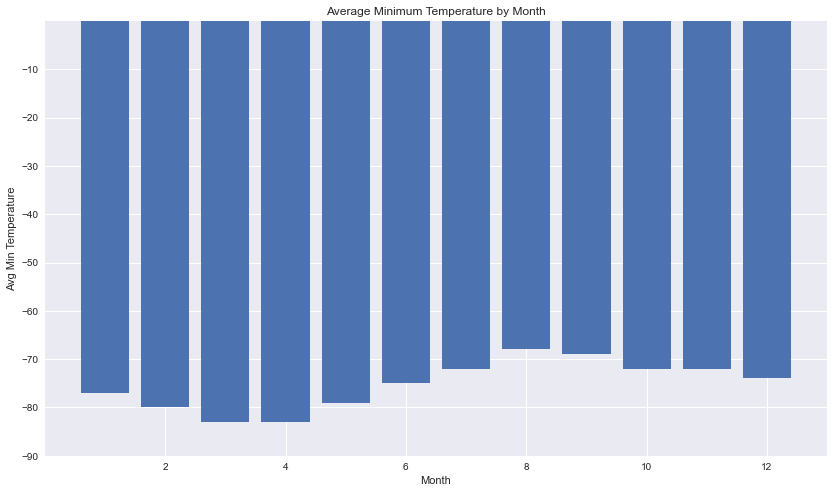

In [38]:
# Plot avg_min_temp
fig = plt.figure()

fig.set_figheight(8)
fig.set_figwidth(14)
                

plt.bar(df_month_temp['month_nb'],df_month_temp['avg_min_temp'])



plt.ylim([-90,0])
plt.yticks(np.arange(-90, 0, 10))

# Create labels for the x and y axes.
plt.xlabel("Month")
plt.ylabel("Avg Min Temperature")

# Create title 
plt.title('Average Minimum Temperature by Month')


In [17]:
# The coldest month(s)
min_avg_temp = df_month_temp['avg_min_temp'].min()
month_min_temp=df_month_temp.loc[df_month_temp['avg_min_temp']==min_avg_temp]
month_min_temp


,month_nb,avg_min_temp
2,3,-83
3,4,-83


In [18]:
# The warmest month
max_avg_temp = df_month_temp['avg_min_temp'].max()
month_max_temp=df_month_temp.loc[df_month_temp['avg_min_temp']==max_avg_temp]
month_max_temp


,month_nb,avg_min_temp
7,8,-68


In [19]:
# Step 9: Identify the months with the highest and lowest atmosphieric pressure on Mars

# Grouping DataFrame by the average of pressure for each month
df_by_month=df.groupby('month')
df_month_pressure=df_by_month.mean().loc[:,['pressure']]
df_month_pressure


,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


In [20]:
# The month with the lowest atmospheric pressure  
min_avg_pressure= df_month_pressure['pressure'].min()
month_min_pressure=df_month_pressure.loc[df_month_pressure['pressure']==min_avg_pressure]
month_min_pressure


,pressure
month,
6,745.054422


In [21]:
# The month with the highest atmospheric pressure  
max_avg_pressure= df_month_pressure['pressure'].max()
month_max_pressure=df_month_pressure.loc[df_month_pressure['pressure']==max_avg_pressure]
month_max_pressure

,pressure
month,
9,913.30597


Text(0.5, 1.0, 'Average Atmospheric Pressure by Month')

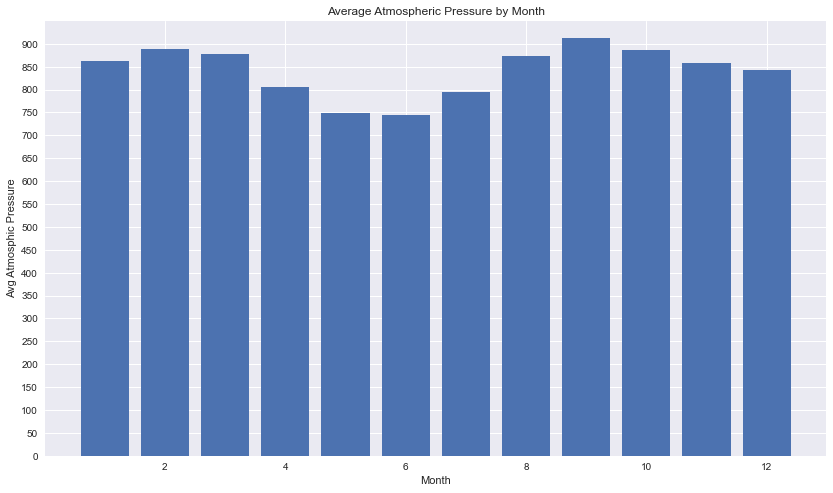

In [36]:
# Plot avg_pressure
fig = plt.figure()

fig.set_figheight(8)
fig.set_figwidth(14)
                

x=range(1,13)
plt.bar(x,df_month_pressure['pressure'])

plt.ylim([0,950])
plt.yticks(np.arange(0, 950, 50))

# Create labels for the x and y axes.
plt.xlabel("Month")
plt.ylabel("Avg Atmosphic Pressure")

# Create title 
plt.title('Average Atmospheric Pressure by Month')


In [23]:
# Step 10: Identify how many terrestrial or Earth days exist in a Martian year

#Finding the original Sun longitude (ls)
orig_long=df['ls'].loc[0]
orig_long

155

In [24]:
# Knowing that the Sun longitude will be the same after Approximately 1 Martial year
# Find the next rows where longitude is equal the orig_long
same_long=df.loc[df['ls']==orig_long]
same_long

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
598,621,2014-07-03,678,155,6,-77.0,739.0
599,624,2014-07-04,679,155,6,-77.0,738.0
1249,1274,2016-05-20,1346,155,6,-75.0,737.0
1250,1277,2016-05-21,1347,155,6,-75.0,736.0


In [25]:
import datetime as dt
from datetime import timedelta
from datetime import datetime

a=same_long['terrestrial_date'].loc[0]
date_after_one_martian_year = same_long['terrestrial_date'].iloc[1]
one_martian_year= date_after_one_martian_year-a
print(f'For one Martian year, approximately ',one_martian_year,'pass on Earth')

For one Martian year, approximately  686 days 00:00:00 pass on Earth


Text(0.5, 1.0, 'Daily Minimum Temperature')

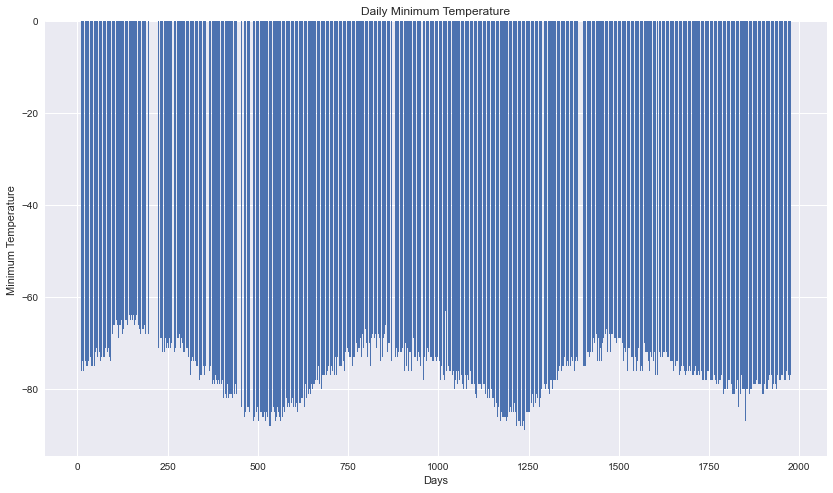

In [39]:
# Ploting the minimum temperature vs Martian Days 
fig = plt.figure()

fig.set_figheight(8)
fig.set_figwidth(14)
                

plt.bar(df['sol'],df['min_temp'])

# Create labels for the x and y axes.
plt.xlabel("Days")
plt.ylabel("Minimum Temperature ")

# Create title 
plt.title('Daily Minimum Temperature')


In [27]:
# Export the DataFrame to a CSV file
df.to_csv('mars_table.csv',index=False)
